# Forecasting with Machine Learning
***

I'm Christopher Woodward, and this is a zero nonsense example of using machine learning to forecast future data.
***

In [347]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

In [348]:
# Some arbitrary data
x = [1,2,3,4,5,6,7,8,9]
y = [11,24,37,46,51,64,77,80,93]

C:\Users\there\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\algorithms.py:100: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))


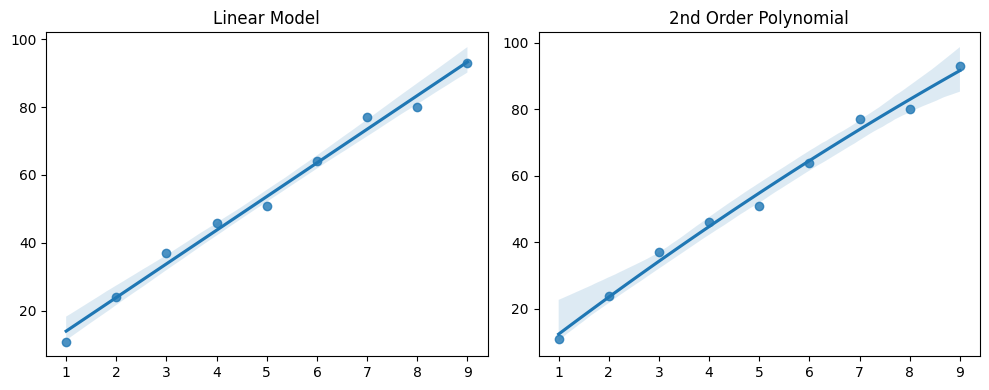

In [349]:
# We can create a regplot with seaborn to get a quick look at which model could be best
fig, axs = plt.subplots(1,2, figsize=(10,4))

sns.regplot(x=x, y=y, ci=95, order=1, ax=axs[0])
axs[0].set_title("Linear Model")

sns.regplot(x=x, y=y, ci=95, order=2, ax=axs[1])
axs[1].set_title("2nd Order Polynomial")

plt.tight_layout()

<Axes: >

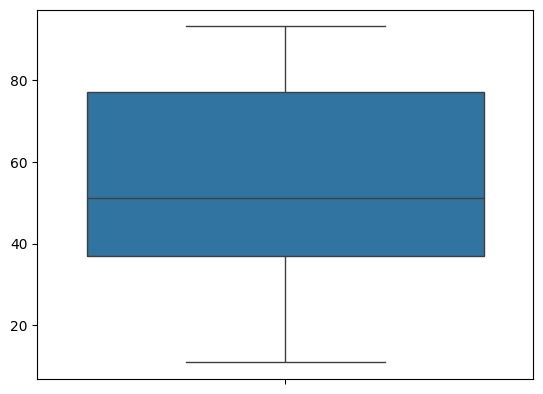

In [350]:
# We can now look at a box plot to see if that one data point is an outlier
sns.boxplot(y=y)

<Axes: >

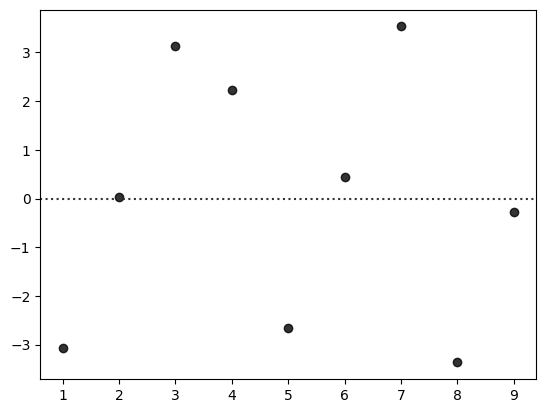

In [351]:
# It is not an outlier.
# Since we have no outliers the confidence bands opening up at the ends
# shows us uncertainty. The linear model is the least uncertain.

# As a final quick step let's look at the residuals
sns.residplot(x=x, y=y, color='black')

In [352]:
# The residuals are randomly spread out, so we can safely assume a linear model would be best

# Creating the model
model = LinearRegression()

# The model needs the x data reshaped
x_reshaped = np.array(x).reshape(-1,1)

# Train the model
model.fit(x_reshaped,y)

# Make predictions
predictions = model.predict(x_reshaped)

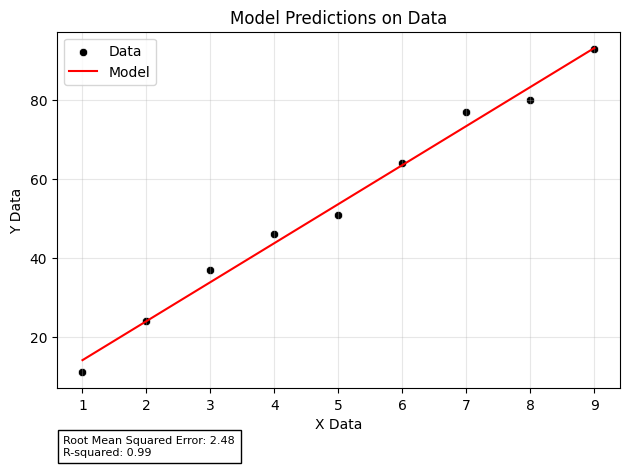

In [353]:
sns.scatterplot(x=x, y=y, color='black', label="Data")
sns.lineplot(x=x, y=predictions, color='red', label="Model")
plt.title("Model Predictions on Data")
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.text(x=0.7, y=-10, s=f"Root Mean Squared Error: {root_mean_squared_error(y, predictions):.2f}\nR-squared: {r2_score(y,predictions):.2f}",
         fontsize=8, bbox=dict(facecolor='white', edgecolor='black'))
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [354]:
# To forecast the next data point and make a prediction as to what it will be
# All we have to do is use the model to predict the next data point
forecast_prediction = model.predict(x_reshaped+1)

forecast_prediction[-1] # Showing only the final value as it is the forecast prediction

103.16666666666669

Text(0.5, 1.0, 'Distribution of Our Data')

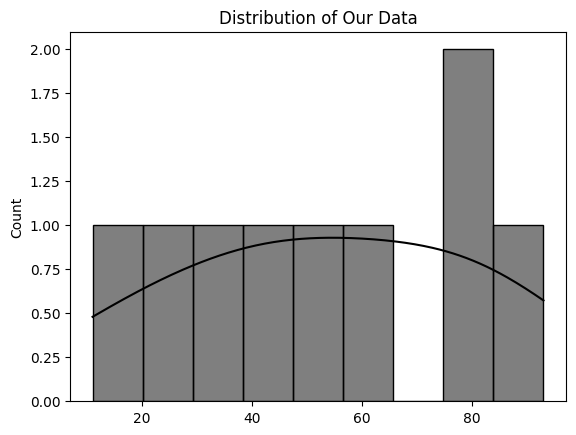

In [355]:
# To find the 95% confidence interval, we need to see if the data is normally distributed
sns.histplot(y, color='black', kde=True, bins=9)
plt.title("Distribution of Our Data")

Text(0.5, 1.0, 'Normal Distribution Example')

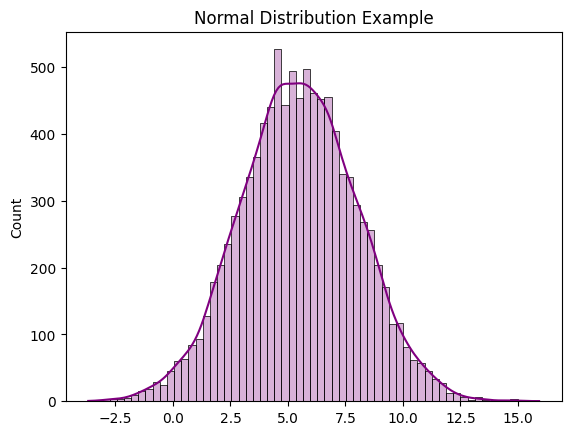

In [356]:
# This is an example of normally distributed data
# The shape or close to it is what we want from our data
sns.histplot(data=np.random.normal(loc=5.5, scale=2.5, size=10000), kde=True, color='purple', alpha=0.3)
plt.title("Normal Distribution Example")

In [357]:
# Since we clearly do not have a normal distribution we can use the residuals
# to calculate the confidence interval
# It is the predictions - the data points.

residuals = predictions - y

residuals

array([ 3.06666667, -0.03333333, -3.13333333, -2.23333333,  2.66666667,
       -0.43333333, -3.53333333,  3.36666667,  0.26666667])

In [358]:
# We need the standard error of the data
SE = np.std(y) / np.sqrt(len(y))

SE

8.560604570781432

In [359]:
# Now we can calculate the confidence interval
confidence_level = 0.95

lower, upper = stats.norm.interval(confidence=confidence_level, loc=np.mean(residuals), scale=SE)

lower, upper

(-16.77847664462058, 16.77847664462057)

In [360]:
# Those numbers look terribly wrong, but remember they are calculated from the residuals
# To get the Confidence Interval, we add each number to the model's forecast prediction

CI_lower = forecast_prediction[-1] + lower
CI_upper = forecast_prediction[-1] + upper

print(f"I can say with {confidence_level*100:.2f}% confidence that the next data point will be between {CI_lower:.2f} and {CI_upper:.2f}")
print(f"This means I am willing to accept a {(1-confidence_level)*100:.2f}% chance that I am wrong.")

print(f"\nThe model predicted: {forecast_prediction[-1]}")

I can say with 95.00% confidence that the next data point will be between 86.39 and 119.95
This means I am willing to accept a 5.00% chance that I am wrong.

The model predicted: 103.16666666666669


In [361]:
# This is just reassigning variables
forecast_x = x_reshaped+1
forecast_y = forecast_prediction

## Note:
***
In this next code cell, there is a lot of code for customizing the graph. This is does not serve the purpose of learning to forecast; I did this to make the graph easy to interpret. It is best to look at the graph to see the predictions and forecast, rather than worry about all the code to pretty it up.

To be more clear, if the code cell below is overwhelming, disregard it all together, and just look at the visualization.

No one has ever won a trophy for making a fancy graph.
***

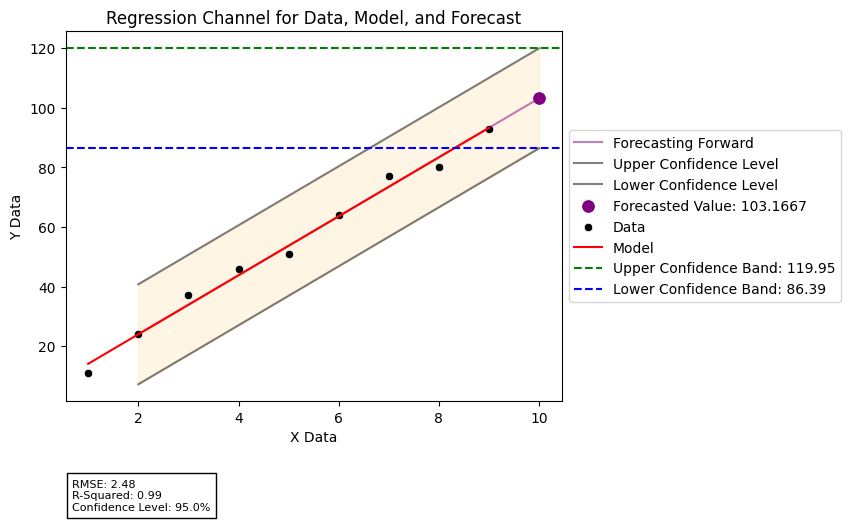

In [362]:
sns.lineplot(x=forecast_x.flatten(), y=forecast_y, color='purple', alpha=0.5, label="Forecasting Forward")
sns.lineplot(x=forecast_x.flatten(), y=forecast_y+upper, color='black', alpha=0.5, label="Upper Confidence Level")
sns.lineplot(x=forecast_x.flatten(), y=forecast_y+lower, color='black', alpha=0.5, label="Lower Confidence Level")
plt.fill_between(forecast_x.flatten(), forecast_y + lower, forecast_y + upper, color='orange', alpha=0.1)

sns.scatterplot(x=forecast_x[-1], y=forecast_y[-1], color='purple', s=100, label=f"Forecasted Value: {forecast_prediction[-1]:.4f}")

sns.scatterplot(x=x, y=y, color='black', label="Data")
sns.lineplot(x=x, y=predictions, color='red', label="Model")

plt.axhline(CI_upper, color='green', linestyle="--", label=f"Upper Confidence Band: {CI_upper:.2f}")
plt.axhline(CI_lower, color='blue', linestyle="--", label=f"Lower Confidence Band: {CI_lower:.2f}")

plt.title("Regression Channel for Data, Model, and Forecast")
plt.xlabel("X Data")
plt.ylabel("Y Data")

plt.text(x=0.68, y=-35, s=f"RMSE: {root_mean_squared_error(y,predictions):.2f}\nR-Squared: {r2_score(y,predictions):.2f}\nConfidence Level: {(confidence_level*100)}%",
         bbox=dict(facecolor='white', edgecolor='black'), fontsize=8)

plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

plt.show()

#### A final note:
***
Just as important as the model's precise prediction is the confidence interval. We can say with 95% confidence that the next data point will be between the lower level and the higher level. This is far more valuable to stakeholders than merely giving them the model's precise prediction, as the model generalizes.

Another thing to note is as you lower the confidence level, the confidence interval becomes narrower as you are accepting a higher probability of being wrong.